In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('MD_agric_exam.csv')

# Basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (1000, 10)

Column names:
['Field_ID', 'Elevation', 'Rainfall', 'Min_temperature_C', 'Max_temperature_C', 'pH', 'Pollution_level', 'Plot_size', 'Annual_yield', 'Crop_type']

First 5 rows:
   Field_ID  Elevation  Rainfall  Min_temperature_C  Max_temperature_C  \
0      1162  494.95615    1507.6               -5.4               31.0   
1      5108  663.73390     581.0               -4.7               30.9   
2      3504  396.87990    1715.1               -6.1               31.7   
3      5351  594.80370    1748.0               -4.3               33.6   
4       905  609.49800    1395.8               -4.5               31.3   

         pH  Pollution_level  Plot_size  Annual_yield Crop_type  
0  6.859436         0.007034        3.6      1.617421    coffee  
1  5.603219         0.289643        4.2      2.532497    potato  
2  5.774116         0.000409        2.6      1.262207    banana  
3  6.477415         0.088777        7.9      4.351564     wheat  
4  5.419586         0.

In [2]:
# Number of unique crop types
num_unique_crops = df['Crop_type'].nunique()
print(f"Number of unique crop types: {num_unique_crops}")

# List all unique crop types
unique_crops = df['Crop_type'].unique()
print(f"Crop types: {unique_crops}")

# Count of each crop type
crop_counts = df['Crop_type'].value_counts()
print("\nCrop distribution:")
print(crop_counts)

Number of unique crop types: 8
Crop types: ['coffee' 'potato' 'banana' 'wheat' 'cassava' 'maize' 'tea' 'rice']

Crop distribution:
Crop_type
wheat      244
potato     146
cassava    141
tea        137
banana     103
coffee      99
maize       82
rice        48
Name: count, dtype: int64


In [3]:
# Maximum annual yield for wheat crop type
wheat_data = df[df['Crop_type'] == 'wheat']
max_wheat_yield = wheat_data['Annual_yield'].max()
print(f"Maximum annual yield for wheat: {max_wheat_yield:.2f}")

# Optional: Show additional wheat statistics
print(f"\nWheat crop statistics:")
print(f"Maximum yield: {wheat_data['Annual_yield'].max():.2f}")
print(f"Minimum yield: {wheat_data['Annual_yield'].min():.2f}")
print(f"Average yield: {wheat_data['Annual_yield'].mean():.2f}")
print(f"Number of wheat fields: {len(wheat_data)}")

# Optional: Show the field with maximum wheat yield
max_wheat_field = wheat_data[wheat_data['Annual_yield'] == wheat_data['Annual_yield'].max()]
print(f"\nField with maximum wheat yield:")
print(max_wheat_field[['Field_ID', 'Annual_yield', 'Plot_size']].to_string(index=False))

Maximum annual yield for wheat: 8.99

Wheat crop statistics:
Maximum yield: 8.99
Minimum yield: 0.17
Average yield: 2.00
Number of wheat fields: 244

Field with maximum wheat yield:
 Field_ID  Annual_yield  Plot_size
     2811      8.994376       14.0


In [4]:
# Find crop types with average pollution level above 0.2
pollution_by_crop = df.groupby('Crop_type')['Pollution_level'].mean()
high_pollution_crops = pollution_by_crop[pollution_by_crop > 0.2]

print("Crop types with average pollution level above 0.2:")
print(high_pollution_crops)

# Filter data for these high pollution crop types
high_pollution_crop_names = high_pollution_crops.index.tolist()
filtered_data = df[df['Crop_type'].isin(high_pollution_crop_names)]

# Calculate total rainfall for these crop types
total_rainfall = filtered_data['Rainfall'].sum()

print(f"\nCrop types with average pollution > 0.2: {high_pollution_crop_names}")
print(f"Total rainfall for these crop types: {total_rainfall:.2f}")

# Optional: Show breakdown by crop type
print(f"\nRainfall breakdown by high pollution crop types:")
rainfall_by_crop = filtered_data.groupby('Crop_type')['Rainfall'].agg(['sum', 'mean', 'count'])
print(rainfall_by_crop.round(2))

Crop types with average pollution level above 0.2:
Crop_type
cassava    0.327714
coffee     0.220615
maize      0.265101
potato     0.252135
tea        0.214799
wheat      0.223527
Name: Pollution_level, dtype: float64

Crop types with average pollution > 0.2: ['cassava', 'coffee', 'maize', 'potato', 'tea', 'wheat']
Total rainfall for these crop types: 941959.70

Rainfall breakdown by high pollution crop types:
                sum     mean  count
Crop_type                          
cassava    178709.1  1267.44    141
coffee     148849.5  1503.53     99
maize       57184.0   697.37     82
potato      93860.2   642.88    146
tea        210650.5  1537.59    137
wheat      252706.4  1035.68    244


In [6]:
def calculate_temperature_range(field_id):
    """
    Calculate the temperature range (Max_temperature_C - Min_temperature_C) for a specific field.

    Parameters:
    field_id (int): The Field_ID to calculate temperature range for

    Returns:
    float: Temperature range, or None if field not found
    """
    # Find the field in the dataset
    field_data = df[df['Field_ID'] == field_id]

    if field_data.empty:
        print(f"Field ID {field_id} not found in dataset")
        return None

    # Calculate temperature range
    max_temp = field_data['Max_temperature_C'].iloc[0]
    min_temp = field_data['Min_temperature_C'].iloc[0]
    temp_range = max_temp - min_temp

    print(f"Field ID {field_id}: Max temp = {max_temp}°C, Min temp = {min_temp}°C, Range = {temp_range}°C")
    return temp_range

# Call the function for the specified Field_IDs
field_ids = [1458, 1895, 5443]
results = {}

print("Temperature Range Calculations:")
print("=" * 50)

for field_id in field_ids:
    temp_range = calculate_temperature_range(field_id)
    results[field_id] = temp_range

print("\n" + "=" * 50)
print("Summary of Results:")
for field_id, temp_range in results.items():
    if temp_range is not None:
        print(f"Field ID {field_id}: Temperature Range = {temp_range}°C")
    else:
        print(f"Field ID {field_id}: Not found")

Temperature Range Calculations:
Field ID 1458: Max temp = 33.5°C, Min temp = -7.2°C, Range = 40.7°C
Field ID 1895: Max temp = 30.3°C, Min temp = -5.4°C, Range = 35.7°C
Field ID 5443: Max temp = 29.7°C, Min temp = -3.7°C, Range = 33.4°C

Summary of Results:
Field ID 1458: Temperature Range = 40.7°C
Field ID 1895: Temperature Range = 35.7°C
Field ID 5443: Temperature Range = 33.4°C


In [7]:
# Calculate total plot size for plots with pH less than 5.5
low_ph_data = df[df['pH'] < 5.5]
total_plot_size = low_ph_data['Plot_size'].sum()

print(f"Total plot size for plots with pH < 5.5: {total_plot_size:.2f}")

# Additional information
print(f"\nAdditional details:")
print(f"Number of plots with pH < 5.5: {len(low_ph_data)}")
print(f"Average plot size for low pH plots: {low_ph_data['Plot_size'].mean():.2f}")
print(f"pH range for these plots: {low_ph_data['pH'].min():.2f} - {low_ph_data['pH'].max():.2f}")

# Optional: Show breakdown by crop type
print(f"\nPlot size breakdown by crop type (pH < 5.5):")
crop_plot_sizes = low_ph_data.groupby('Crop_type')['Plot_size'].agg(['sum', 'count', 'mean']).round(2)
print(crop_plot_sizes)

Total plot size for plots with pH < 5.5: 1731.90

Additional details:
Number of plots with pH < 5.5: 469
Average plot size for low pH plots: 3.69
pH range for these plots: 3.70 - 5.50

Plot size breakdown by crop type (pH < 5.5):
             sum  count  mean
Crop_type                    
banana     129.2     31  4.17
cassava    469.9    108  4.35
coffee      28.1      8  3.51
maize       51.3     15  3.42
potato     282.0     95  2.97
rice        43.0     11  3.91
tea        486.1    134  3.63
wheat      242.3     67  3.62


In [ ]:
# Create a dataframe with Min_temperature_C < -5 AND Max_temperature_C > 30
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Count the number of rows in the filtered dataset
num_rows = len(filtered_df)
print(f"Number of rows with Min_temperature_C < -5 AND Max_temperature_C > 30: {num_rows}")

# Additional information about the filtered data
print(f"\nFiltered dataset shape: {filtered_df.shape}")

# Show some details about the temperature ranges in filtered data
if num_rows > 0:
    print(f"\nTemperature statistics for filtered data:")
    print(f"Min temperature range: {filtered_df['Min_temperature_C'].min():.2f} to {filtered_df['Min_temperature_C'].max():.2f}°C")
    print(f"Max temperature range: {filtered_df['Max_temperature_C'].min():.2f} to {filtered_df['Max_temperature_C'].max():.2f}°C")
    print(f"Average temperature range: {(filtered_df['Max_temperature_C'] - filtered_df['Min_temperature_C']).mean():.2f}°C")

    # Show crop types in these extreme temperature conditions
    print(f"\nCrop types in these extreme temperature conditions:")
    crop_counts_filtered = filtered_df['Crop_type'].value_counts()
    print(crop_counts_filtered)

    # Display first few rows
    print(f"\nFirst few rows of filtered data:")
    print(filtered_df[['Field_ID', 'Min_temperature_C', 'Max_temperature_C', 'Crop_type', 'Annual_yield']].head())
else:
    print("No rows found matching the criteria.")

Number of rows with Min_temperature_C < -5 AND Max_temperature_C > 30: 319

Filtered dataset shape: (319, 10)

Temperature statistics for filtered data:
Min temperature range: -9.70 to -5.10°C
Max temperature range: 30.10 to 37.30°C
Average temperature range: 38.91°C

Crop types in these extreme temperature conditions:
Crop_type
wheat      108
banana      65
rice        43
potato      34
cassava     27
coffee      24
maize       18
Name: count, dtype: int64

First few rows of filtered data:
    Field_ID  Min_temperature_C  Max_temperature_C Crop_type  Annual_yield
0       1162               -5.4               31.0    coffee      1.617421
2       3504               -6.1               31.7    banana      1.262207
5       2274               -7.2               34.3    banana      1.743458
13      4807               -6.3               32.9    potato      0.881568
14       973               -6.0               30.2     wheat      1.377434


In [9]:
# Calculate the standard deviation of rainfall for plots larger than median plot size
import numpy as np

# Calculate median plot size
median_plot_size = np.median(df['Plot_size'])
print(f"Median plot size: {median_plot_size:.2f}")

# Filter for plots larger than median plot size
large_plots = df[df['Plot_size'] > median_plot_size]
print(f"Number of plots larger than median: {len(large_plots)}")

# Calculate standard deviation of rainfall for these large plots using NumPy
rainfall_std = np.std(large_plots['Rainfall'], ddof=1)  # ddof=1 for sample standard deviation
print(f"Standard deviation of rainfall for plots larger than median: {rainfall_std:.2f}")

# Additional information
print(f"\nAdditional statistics for large plots:")
print(f"Mean rainfall: {np.mean(large_plots['Rainfall']):.2f}")
print(f"Min rainfall: {np.min(large_plots['Rainfall']):.2f}")
print(f"Max rainfall: {np.max(large_plots['Rainfall']):.2f}")
print(f"Plot size range for large plots: {np.min(large_plots['Plot_size']):.2f} - {np.max(large_plots['Plot_size']):.2f}")

Median plot size: 2.90
Number of plots larger than median: 497
Standard deviation of rainfall for plots larger than median: 470.09

Additional statistics for large plots:
Mean rainfall: 1249.14
Min rainfall: 263.00
Max rainfall: 2408.50
Plot size range for large plots: 3.00 - 15.00


In [10]:
# Find the most common Max_temperature_C value
max_temp_counts = df['Max_temperature_C'].value_counts()
most_common_max_temp = max_temp_counts.index[0]  # First mode if multiple modes
print(f"Most common Max_temperature_C: {most_common_max_temp}")

# Find the least common Crop_type
crop_counts = df['Crop_type'].value_counts()
least_common_crop = crop_counts.index[-1]  # Last in the sorted counts (least common)
print(f"Least common Crop_type: {least_common_crop}")

# Get first three digits of most common Max_temperature_C
max_temp_str = str(most_common_max_temp)
first_three_digits = ''.join([char for char in max_temp_str if char.isdigit()][:3])
print(f"First three digits of {most_common_max_temp}: {first_three_digits}")

# Get last three letters of least common Crop_type
last_three_letters = least_common_crop[-3:]
print(f"Last three letters of {least_common_crop}: {last_three_letters}")

# Concatenate the results
result_string = first_three_digits + last_three_letters
print(f"\nConcatenated result: {result_string}")

# Additional verification
print(f"\nVerification:")
print(f"Most common Max_temperature_C frequency: {max_temp_counts.iloc[0]}")
print(f"Least common Crop_type frequency: {crop_counts.iloc[-1]}")
print(f"All Max_temperature_C value counts (top 5):")
print(max_temp_counts.head())
print(f"All Crop_type value counts:")
print(crop_counts)

Most common Max_temperature_C: 30.7
Least common Crop_type: rice
First three digits of 30.7: 307
Last three letters of rice: ice

Concatenated result: 307ice

Verification:
Most common Max_temperature_C frequency: 26
Least common Crop_type frequency: 48
All Max_temperature_C value counts (top 5):
Max_temperature_C
30.7    26
31.0    25
30.5    24
31.5    23
30.2    22
Name: count, dtype: int64
All Crop_type value counts:
Crop_type
wheat      244
potato     146
cassava    141
tea        137
banana     103
coffee      99
maize       82
rice        48
Name: count, dtype: int64


C:\Users\prisc\AppData\Local\Temp\ipykernel_27088\575538543.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')


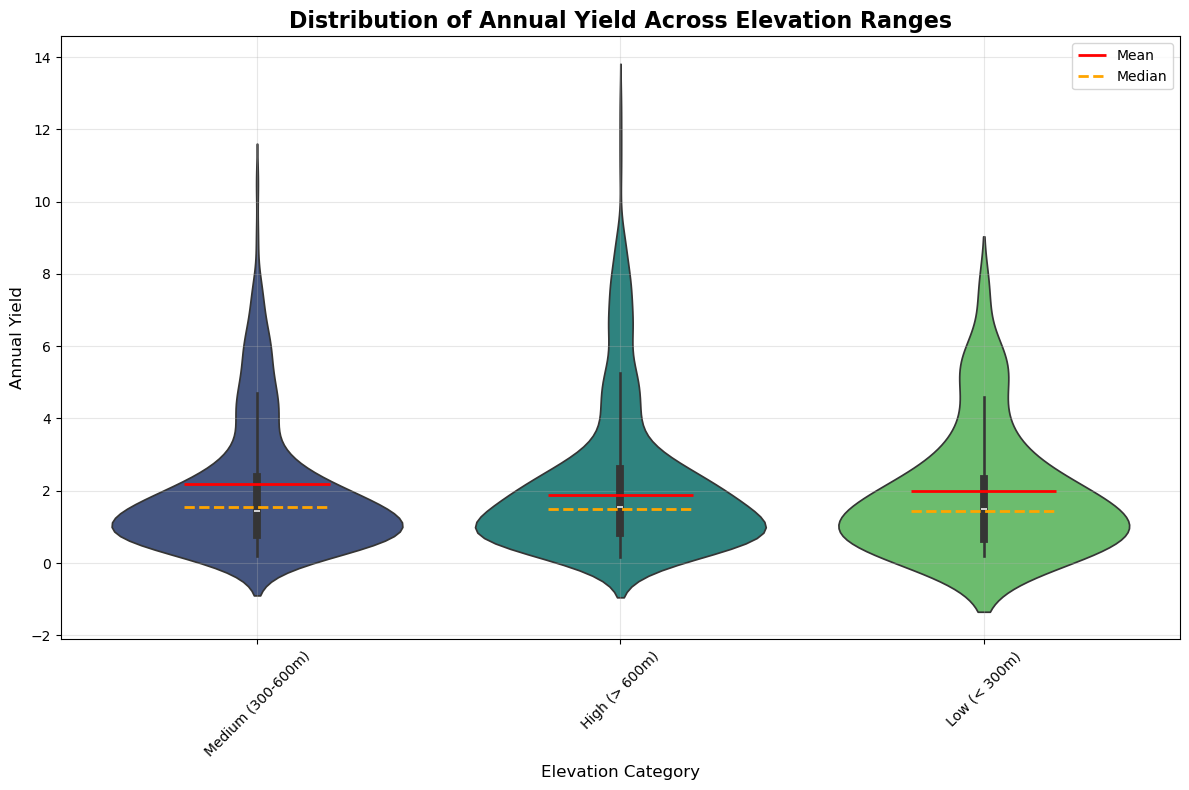

Summary Statistics by Elevation Category:

Low (< 300m):
  Count: 52
  Mean: 1.89
  Median: 1.49
  Std Dev: 1.70
  Min: 0.19
  Max: 7.50

Medium (300-600m):
  Count: 333
  Mean: 1.99
  Median: 1.43
  Std Dev: 1.75
  Min: 0.20
  Max: 10.51

High (> 600m):
  Count: 615
  Mean: 2.18
  Median: 1.55
  Std Dev: 2.03
  Min: 0.17
  Max: 12.70


C:\Users\prisc\AppData\Local\Temp\ipykernel_27088\575538543.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')
C:\Users\prisc\AppData\Local\Temp\ipykernel_27088\575538543.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')


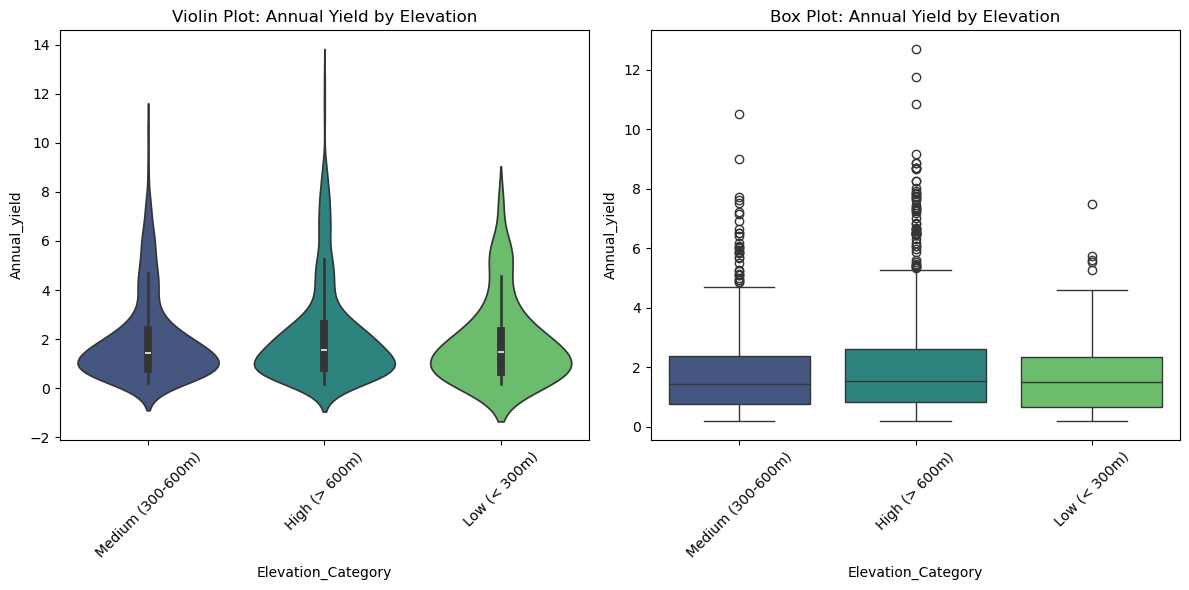


Elevation Category Distribution:
Elevation_Category
High (> 600m)        615
Low (< 300m)          52
Medium (300-600m)    333
Name: count, dtype: int64


In [ ]:
# Create violin plot for Annual_yield distribution across elevation ranges
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create elevation categories
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low (< 300m)'
    elif elevation <= 600:
        return 'Medium (300-600m)'
    else:
        return 'High (> 600m)'

# Apply categorization
df['Elevation_Category'] = df['Elevation'].apply(categorize_elevation)

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')

# Customize the plot
plt.title('Distribution of Annual Yield Across Elevation Ranges', fontsize=16, fontweight='bold')
plt.xlabel('Elevation Category', fontsize=12)
plt.ylabel('Annual Yield', fontsize=12)
plt.xticks(rotation=45)

# Add statistics overlay
for i, category in enumerate(['High (> 600m)', 'Low (< 300m)', 'Medium (300-600m)']):
    category_data = df[df['Elevation_Category'] == category]['Annual_yield']
    mean_yield = category_data.mean()
    median_yield = category_data.median()

    # Add mean and median lines
    plt.hlines(mean_yield, i-0.2, i+0.2, colors='red', linestyles='solid', linewidth=2, label=f'Mean' if i == 0 else "")
    plt.hlines(median_yield, i-0.2, i+0.2, colors='orange', linestyles='dashed', linewidth=2, label=f'Median' if i == 0 else "")

plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics for each elevation category
print("Summary Statistics by Elevation Category:")
print("=" * 50)
for category in ['Low (< 300m)', 'Medium (300-600m)', 'High (> 600m)']:
    category_data = df[df['Elevation_Category'] == category]['Annual_yield']
    print(f"\n{category}:")
    print(f"  Count: {len(category_data)}")
    print(f"  Mean: {category_data.mean():.2f}")
    print(f"  Median: {category_data.median():.2f}")
    print(f"  Std Dev: {category_data.std():.2f}")
    print(f"  Min: {category_data.min():.2f}")
    print(f"  Max: {category_data.max():.2f}")

# Additional analysis - box plot for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')
plt.title('Violin Plot: Annual Yield by Elevation')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Elevation_Category', y='Annual_yield', palette='viridis')
plt.title('Box Plot: Annual Yield by Elevation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Distribution analysis
print(f"\nElevation Category Distribution:")
print(df['Elevation_Category'].value_counts().sort_index())

In [ ]:
def recursive_crop_sum(crop_list, index=0):
    """
    Recursive function to sum the length of each unique crop type name.

    Parameters:
    crop_list: list of unique crop types
    index: current index in the list (default 0)

    Returns:
    int: sum of lengths of all crop type names
    """
    # Base case: if we've processed all crop types
    if index >= len(crop_list):
        return 0

    # Recursive case: add current crop length + sum of remaining crops
    current_crop_length = len(crop_list[index])
    return current_crop_length + recursive_crop_sum(crop_list, index + 1)

# Get unique crop types from the dataset
unique_crops = df['Crop_type'].unique()
print("Unique crop types and their lengths:")
for crop in unique_crops:
    print(f"'{crop}': {len(crop)} characters")

# Calculate the sum using the recursive function
total_sum = recursive_crop_sum(unique_crops.tolist())

print(f"\nUnique crop types: {unique_crops.tolist()}")
print(f"Number of unique crop types: {len(unique_crops)}")
print(f"Sum of all crop type lengths: {total_sum}")

# Verification using non-recursive approach
verification_sum = sum(len(crop) for crop in unique_crops)
print(f"Verification (non-recursive): {verification_sum}")
print(f"Results match: {total_sum == verification_sum}")

Unique crop types and their lengths:
'coffee': 6 characters
'potato': 6 characters
'banana': 6 characters
'wheat': 5 characters
'cassava': 7 characters
'maize': 5 characters
'tea': 3 characters
'rice': 4 characters

Unique crop types: ['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea', 'rice']
Number of unique crop types: 8
Sum of all crop type lengths: 42
Verification (non-recursive): 42
Results match: True


In [ ]:
# Perform t-test comparing Annual_yield between coffee and banana crop types
from scipy import stats
import numpy as np

# Filter data for coffee and banana crop types
coffee_data = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_data = df[df['Crop_type'] == 'banana']['Annual_yield']

# Check if both crop types exist in the dataset
print("Data summary:")
print(f"Coffee crops: {len(coffee_data)} records")
print(f"Banana crops: {len(banana_data)} records")

if len(coffee_data) > 0 and len(banana_data) > 0:
    # Perform independent samples t-test
    t_statistic, p_value = stats.ttest_ind(coffee_data, banana_data)

    print(f"\nT-test results:")
    print(f"Coffee mean yield: {coffee_data.mean():.2f}")
    print(f"Banana mean yield: {banana_data.mean():.2f}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.6f}")
    print(f"P-value (rounded to 3 decimal places): {p_value:.3f}")

    # Statistical interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"\nResult: Statistically significant difference (p < {alpha})")
        print("We reject the null hypothesis - there is a significant difference in mean yields")
    else:
        print(f"\nResult: No statistically significant difference (p >= {alpha})")
        print("We fail to reject the null hypothesis - no significant difference in mean yields")

    # Additional statistics
    print(f"\nAdditional statistics:")
    print(f"Coffee - Mean: {coffee_data.mean():.2f}, Std: {coffee_data.std():.2f}")
    print(f"Banana - Mean: {banana_data.mean():.2f}, Std: {banana_data.std():.2f}")
    print(f"Difference in means: {coffee_data.mean() - banana_data.mean():.2f}")

else:
    print("Error: One or both crop types not found in the dataset")
    print("Available crop types:")
    print(df['Crop_type'].unique())

Data summary:
Coffee crops: 99 records
Banana crops: 103 records

T-test results:
Coffee mean yield: 1.95
Banana mean yield: 2.08
T-statistic: -0.5277
P-value: 0.598264
P-value (rounded to 3 decimal places): 0.598

Result: No statistically significant difference (p >= 0.05)
We fail to reject the null hypothesis - no significant difference in mean yields

Additional statistics:
Coffee - Mean: 1.95, Std: 1.66
Banana - Mean: 2.08, Std: 1.77
Difference in means: -0.13
